# 차량 번호판 인식

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

In [2]:
#이미지 읽기
img_path = './data/car_plate_2.png'
image = cv2.imread(img_path)

#BGR >> RGB 색상 컨버터
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [3]:
#이미지 나타내는 함수
def draw(img, text):
    plt.imshow(img)
    plt.title(text)
    plt.show()

def gray_draw(img, text):
    plt.imshow(img, 'gray')
    plt.title(text)
    plt.show()

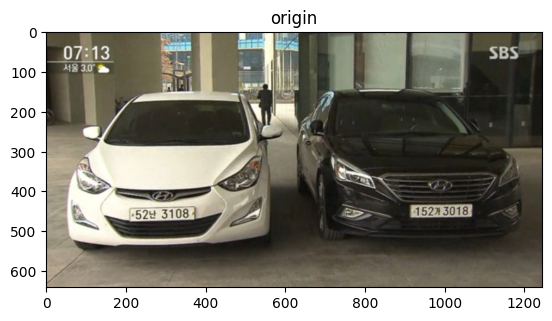

In [4]:
draw(image,'origin')

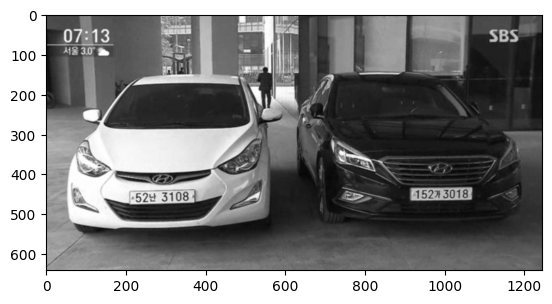

In [5]:
#graysccale
gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_img, 'gray')
plt.show()

## Maximize contrast
이미지의 어두운 부분과 밝은 부분의 차이를 높인다 => 대비를 높여 선명도를 올림

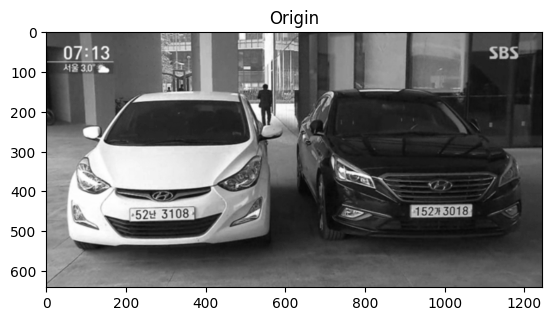

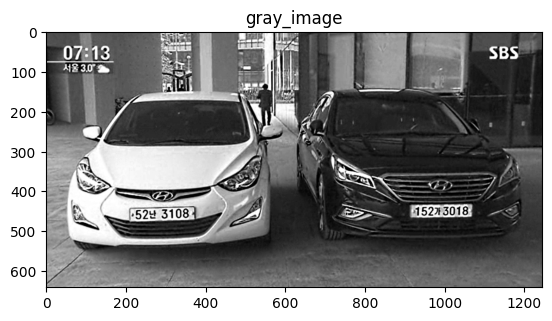

In [6]:
#모놀로지 연산
#9x9 직사각형 크기 구조 요소를 생성 -> structuringElement 변수에 할당
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))

#TOPHAT -> 밝은 부분 강조
imgTopHat = cv2.morphologyEx(gray_img, cv2.MORPH_TOPHAT, structuringElement)
#BLACKHT -> 어두운 부분 강조
imgBlackHat = cv2.morphologyEx(gray_img, cv2.MORPH_BLACKHAT, structuringElement)

#cv2.add -> 두 이미지의 같은 위치에 존재하는 픽셀 값을 더해 결과 값으로 설정
imgGrayscalePlusTophat = cv2.add(gray_img, imgTopHat)

#cs2.substract -> 두 이미지의 같은 위치에 존재한느 픽셀을 빼서 결과값
gray = cv2.subtract(imgGrayscalePlusTophat, imgBlackHat)


#원래 이미지와 비교
gray_draw(gray_img,'Origin')
gray_draw(gray,'gray_image')

- 과정 보기

[[0 0 0 ... 0 0 0]
 [4 4 3 ... 3 3 5]
 [3 4 3 ... 2 3 5]
 ...
 [6 6 4 ... 1 1 3]
 [4 5 3 ... 0 0 2]
 [6 5 3 ... 0 1 2]]


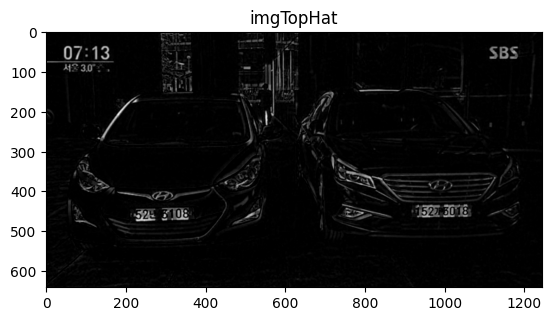

In [7]:
print(imgTopHat)
gray_draw(imgTopHat,'imgTopHat')

[[ 33  33  33 ...  33  33  33]
 [ 84  84  82 ...  81  81  84]
 [ 82  84  82 ...  79  81  84]
 ...
 [166 166 162 ... 103 101 105]
 [162 164 160 ... 101  99 103]
 [166 164 160 ... 101 101 103]]


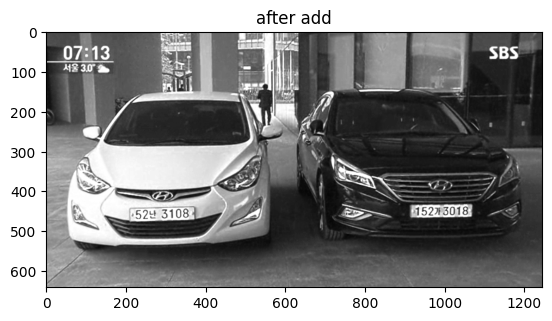

In [8]:
print(imgGrayscalePlusTophat)
gray_draw(imgGrayscalePlusTophat,'after add')

[[  0   0   0 ...   0   0   0]
 [ 84  84  82 ...  80  80  84]
 [ 81  84  82 ...  77  80  84]
 ...
 [164 164 158 ... 100  96 102]
 [158 161 155 ...  97  93  99]
 [164 161 155 ...  97  96  99]]


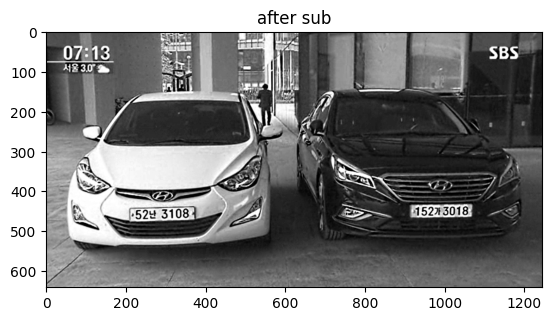

In [9]:
#최종
print(gray)
gray_draw(gray,'after sub')

## 이진화 Adaptive Thresholding
번호판 경계선을 따기 위해 이진화를 해서 선명도 높임

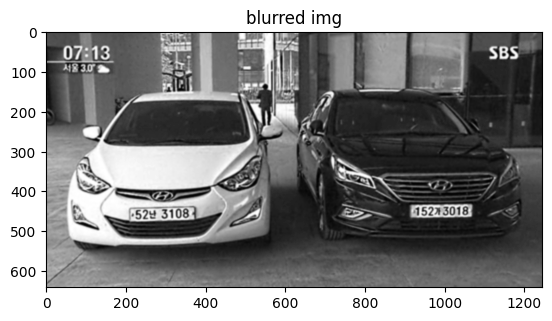

In [10]:
#가우시안 블러
#가우시안 블러를 사용한 후 threshold를 쓰면 outline을 딸 때 더 명확해진다
img_blurred = cv2.GaussianBlur(gray, ksize=(7,7), sigmaX=0)

gray_draw(img_blurred,'blurred img')

Gaussian Adaptive Thresholding 이란?

: 주변 픽셀의 가중 평균값을 사용

평균값X, 가중 평균값 사용 -> 주변 픽셀이 픽셀에 더 큰 영향을 미침

가중 평균값이 픽셀값 보다 작으면 0, 아니면 255

In [11]:
img_tresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=15,
    C=9
)

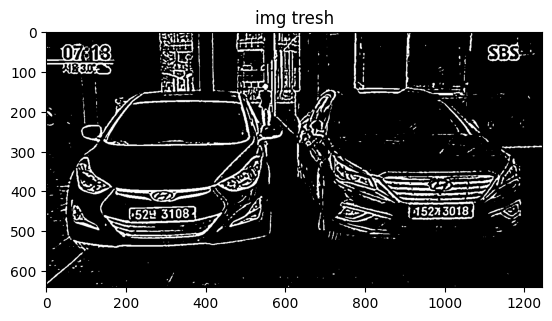

In [12]:
gray_draw(img_tresh,'img tresh')

## 외각선 검출 find Contours

In [13]:
contours, herarchy = cv2.findContours(
    img_tresh,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)
#img size
height, width, channel = image.shape
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

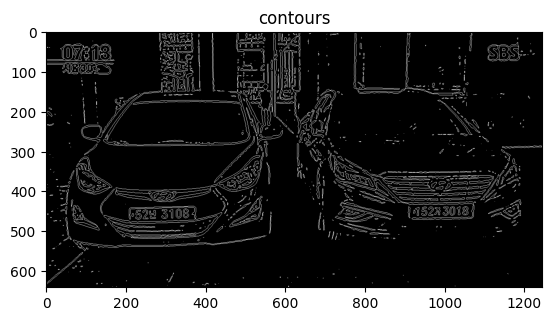

In [14]:
#contours 그리기
cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(225,225,225))

gray_draw(temp_result,'contours')

## image processing Bounding Box

In [15]:
contours

(array([[[176, 640]],
 
        [[177, 640]]], dtype=int32),
 array([[[167, 640]]], dtype=int32),
 array([[[1026,  638]],
 
        [[1027,  638]]], dtype=int32),
 array([[[608, 638]],
 
        [[608, 640]],
 
        [[609, 640]],
 
        [[609, 638]]], dtype=int32),
 array([[[304, 636]]], dtype=int32),
 array([[[393, 634]],
 
        [[393, 635]],
 
        [[394, 635]],
 
        [[394, 634]]], dtype=int32),
 array([[[433, 632]]], dtype=int32),
 array([[[424, 632]],
 
        [[423, 633]],
 
        [[424, 634]],
 
        [[426, 634]]], dtype=int32),
 array([[[402, 631]],
 
        [[398, 635]],
 
        [[398, 636]],
 
        [[399, 636]],
 
        [[403, 632]],
 
        [[406, 632]],
 
        [[407, 633]],
 
        [[408, 633]],
 
        [[407, 632]],
 
        [[406, 632]],
 
        [[405, 631]]], dtype=int32),
 array([[[139, 631]],
 
        [[138, 632]],
 
        [[140, 632]],
 
        [[141, 631]]], dtype=int32),
 array([[[127, 631]],
 
        [[126, 632]],
 
  

In [16]:
contours_dict = []

#bounding Box
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)      #컨투어의 사각형 범위
    #bounding box
    cv2.rectangle(temp_result,
                  pt1=(x,y),
                  pt2=(x+w, y+h),
                  color=(225,225,225),
                  thickness=2)
    #insert to dict
    contours_dict.append({
        'contour': contour,
        'x':x,
        'y':y,
        'w':w,
        'h':h,
        'cx': x + (w/2),
        'cy': y + (h/2)
    })

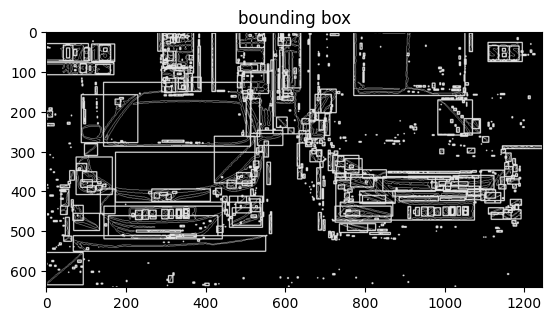

In [17]:
gray_draw(temp_result,'bounding box')

In [18]:
contours_dict

[{'contour': array([[[176, 640]],
  
         [[177, 640]]], dtype=int32),
  'x': 176,
  'y': 640,
  'w': 2,
  'h': 1,
  'cx': 177.0,
  'cy': 640.5},
 {'contour': array([[[167, 640]]], dtype=int32),
  'x': 167,
  'y': 640,
  'w': 1,
  'h': 1,
  'cx': 167.5,
  'cy': 640.5},
 {'contour': array([[[1026,  638]],
  
         [[1027,  638]]], dtype=int32),
  'x': 1026,
  'y': 638,
  'w': 2,
  'h': 1,
  'cx': 1027.0,
  'cy': 638.5},
 {'contour': array([[[608, 638]],
  
         [[608, 640]],
  
         [[609, 640]],
  
         [[609, 638]]], dtype=int32),
  'x': 608,
  'y': 638,
  'w': 2,
  'h': 3,
  'cx': 609.0,
  'cy': 639.5},
 {'contour': array([[[304, 636]]], dtype=int32),
  'x': 304,
  'y': 636,
  'w': 1,
  'h': 1,
  'cx': 304.5,
  'cy': 636.5},
 {'contour': array([[[393, 634]],
  
         [[393, 635]],
  
         [[394, 635]],
  
         [[394, 634]]], dtype=int32),
  'x': 393,
  'y': 634,
  'w': 2,
  'h': 2,
  'cx': 394.0,
  'cy': 635.0},
 {'contour': array([[[433, 632]]], dtype=i

## 차량이미지 select candidates by char size

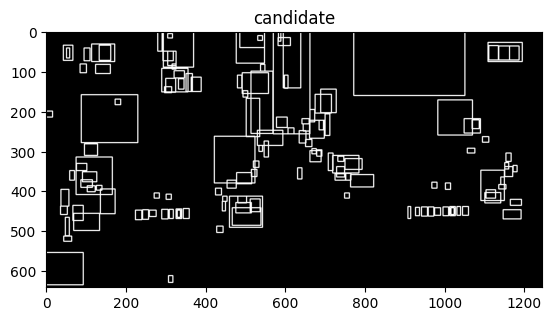

In [19]:
#번호판숫자 bounding box 예측값
MIN_AREA = 120
MIN_WIDTH, MIN_HEIGHT =3, 10 
MIN_RATIO, MAX_RATIO = 0.2, 2

possible_contours =[]

cnt=0
for d in contours_dict:
    #면적과 비율 계산
    area = d['w'] * d['h']
    ratio = d['w']/ d['h']

    #조건에 맞는 애들만 possible dict에 넣음
    if area > MIN_AREA \
    and d['w']> MIN_WIDTH\
    and d['h']> MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt+=1
        possible_contours.append(d)

#visualize possible contours
temp_result = np.zeros((height, width, channel), dtype= np.uint8)

#좌표값으로 rectangle 그림
for d in possible_contours:
    cv2.rectangle(temp_result,
                  pt1=(d['x'], d['y']),
                  pt2=(d['x']+d['w'], d['y']+d['h']),
                  color=(255,255,255),
                  thickness=2)
    
gray_draw(temp_result,'candidate')

In [20]:
len(possible_contours)

139

Select Candidates는 윤곽선의 배열에 따라 후보를 선택하는 작업,

주로 문자인식(OCR), 문자 검출(Text Detection)에 사용된다

- 차량 번호판 detect

In [21]:
# 임계값 설정
MAX_DIAG_MULTIPLYER = 5     #두 윤곽선 대각선 사이 거리
MAX_ANGLE_DIFF = 12.0       #두 윤곽선 사이 각도
MAX_AREA_DIFF = 0.55         #두 윤곽선 사이 최대 면적 차이
MAX_WIDTH_DIFF = 0.8        #두 윤곽선 사이 최대 너비 차이
MAX_HEIGHT_DIFF = 0.2       #두 윤곽선 사이 최대 높이 차이
MIN_N_MATCHED = 4           #매칭된 윤곽선의 최소 개수


In [22]:
print(len(possible_contours))

139


In [23]:
def find_chars(contour_list):
    matched_result_idx = []     #최종 index
    #컨투어 두 개 비교
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] **2)

            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']])-np.array([d2['cx'],d2['cy']]))

            if dx ==0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy/dx))
            
            area_diff = abs(d1['w']*d1['h'] - d2['w']*d2['h'])/(d1['w']*d1['h'])
            width_diff = abs(d1['w']-d2['w'])/d1['w']
            height_diff = abs(d1['h']-d2['h'])/d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])
                print(d2['idx'],' append', 'when d1:', d1['idx'])

        

        matched_contours_idx.append(d1['idx'])
    
        if len(matched_contours_idx)< MIN_N_MATCHED:
            continue

        matched_result_idx.append(matched_contours_idx)
        print("matched_result_idx",matched_result_idx)

        #매칭되지 않은 애들 한 번 더 비교
        unmatched_contour_idx = []

        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])
        #매칭되지 않은 객체들을 추출해서 저장 ????
        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)

        
        print("재귀!!")
        #recursive
        recursive_contour_list = find_chars(unmatched_contour)

        #재귀함수로도 살아남은 애들을 result에 넣어줌
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)
        break

    return matched_result_idx



In [24]:
find_chars(possible_contours)

6  append when d1: 7
10  append when d1: 8
11  append when d1: 8
12  append when d1: 8
13  append when d1: 8
14  append when d1: 8
matched_result_idx [[10, 11, 12, 13, 14, 8]]
재귀!!
6  append when d1: 7
5  append when d1: 16
15  append when d1: 17
18  append when d1: 17
19  append when d1: 17
22  append when d1: 17
23  append when d1: 17
matched_result_idx [[15, 18, 19, 22, 23, 17]]
재귀!!
6  append when d1: 7
5  append when d1: 16
21  append when d1: 20
24  append when d1: 20
20  append when d1: 21
24  append when d1: 21
20  append when d1: 24
21  append when d1: 24
28  append when d1: 31
37  append when d1: 35
35  append when d1: 37
47  append when d1: 46
46  append when d1: 47
54  append when d1: 51
53  append when d1: 52
59  append when d1: 61
72  append when d1: 66
78  append when d1: 71
66  append when d1: 72
71  append when d1: 78
67  append when d1: 81
87  append when d1: 83
83  append when d1: 87
105  append when d1: 104
104  append when d1: 105
107  append when d1: 106
103  appe

[[10, 11, 12, 13, 14, 8], [15, 18, 19, 22, 23, 17]]

In [25]:
result_idx = find_chars(possible_contours)

matched_result = []

for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

#좌표뽑기
for r in matched_result:
    for d in r:
        x1_temp = d['x']
        y1_temp = d['y']
        w1_temp = d['w']
        h1_temp = d['h']
        print(x1_temp, y1_temp, w1_temp, h1_temp)
        cv2.rectangle(temp_result,
                      pt1=(x1_temp,y1_temp),
                      pt2=(x1_temp+w1_temp, y1_temp+h1_temp),
                      color=(255,255,255),
                      thickness=2)

6  append when d1: 7
10  append when d1: 8
11  append when d1: 8
12  append when d1: 8
13  append when d1: 8
14  append when d1: 8
matched_result_idx [[10, 11, 12, 13, 14, 8]]
재귀!!
6  append when d1: 7
5  append when d1: 16
15  append when d1: 17
18  append when d1: 17
19  append when d1: 17
22  append when d1: 17
23  append when d1: 17
matched_result_idx [[15, 18, 19, 22, 23, 17]]
재귀!!
6  append when d1: 7
5  append when d1: 16
21  append when d1: 20
24  append when d1: 20
20  append when d1: 21
24  append when d1: 21
20  append when d1: 24
21  append when d1: 24
28  append when d1: 31
37  append when d1: 35
35  append when d1: 37
47  append when d1: 46
46  append when d1: 47
54  append when d1: 51
53  append when d1: 52
59  append when d1: 61
72  append when d1: 66
78  append when d1: 71
66  append when d1: 72
71  append when d1: 78
67  append when d1: 81
87  append when d1: 83
83  append when d1: 87
105  append when d1: 104
104  append when d1: 105
107  append when d1: 106
103  appe

In [26]:
result_idx

[[10, 11, 12, 13, 14, 8], [15, 18, 19, 22, 23, 17]]

In [27]:
np.array(matched_result).shape

(2, 6)

In [28]:
print(matched_result)

[array([{'contour': array([[[248, 447]],

              [[247, 448]],

              [[246, 448]],

              [[245, 449]],

              [[244, 449]],

              [[243, 450]],

              [[243, 451]],

              [[242, 452]],

              [[242, 453]],

              [[244, 455]],

              [[246, 453]],

              [[246, 452]],

              [[248, 450]],

              [[250, 450]],

              [[252, 452]],

              [[252, 456]],

              [[249, 459]],

              [[249, 460]],

              [[247, 462]],

              [[247, 463]],

              [[245, 465]],

              [[245, 466]],

              [[243, 468]],

              [[243, 469]],

              [[244, 470]],

              [[255, 470]],

              [[256, 469]],

              [[256, 468]],

              [[255, 468]],

              [[254, 467]],

              [[253, 467]],

              [[252, 468]],

              [[250, 468]],

              [[248, 466]],

 

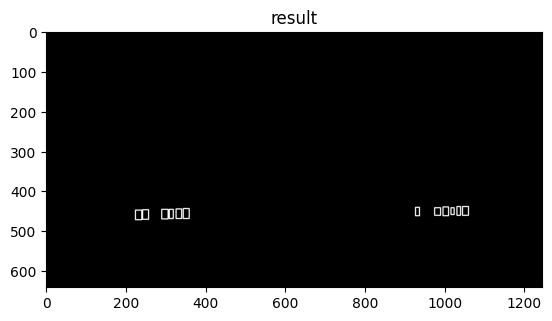

In [29]:
gray_draw(temp_result,'result')

## 차량 번호판 이미지 회전

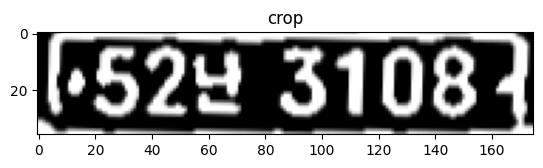

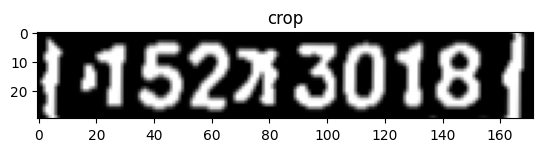

In [40]:
PLATE_WIDTH_PADDING = 1.3
PLATE_HEIGHT_PADDING = 1.5
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infors =[]

for i, matched_chars in enumerate(matched_result):     #count대신 enunerate 많이 사용
    
    #x방향 순차 정렬
    sorted_chars = sorted(matched_chars, key= lambda x : x['cx'])
    

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx'])/2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy'])/2

    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING

    sum_height = 0
    for d in sorted_chars:
        sum_height +=d['h']

    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)

    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    
    angle = np.degrees(np.arcsin(triangle_height/triangle_hypotenus))

    #cv2.getRotationMatrix2D 함수는 중심점을 기준으로 이미지를 회전하기 위한 변환 행렬을 생성하는 함수입니다.
    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)

    #cv2.warpAffine 함수는 이미지에 변환 행렬을 적용하여 이미지를 변환하는 함수입니다.
    img_rotated = cv2.warpAffine(img_tresh, M=rotation_matrix, dsize=(width, height))

    #입력받은 이미지에서 특정한 부분 잘라냄
    #cv2.getRectSubPix() 함수는 지정한 영역을 잘라낸 결과 이미지를 반환합니다.
    img_cropped = cv2.getRectSubPix(
        img_rotated,
        patchSize=(int(plate_width),int(plate_height)),
        center= (int(plate_cx), int(plate_cy))
    )

    plate_imgs.append(img_cropped)

    plate_infors.append({
        'x': int(plate_cx - plate_width/2),
        'y': int(plate_cy - plate_height/2),
        'w': int(plate_width),
        'h': int(plate_height)
    })

    gray_draw(img_cropped,'crop')


 

- another Thresholding to find chars

In [41]:
longest_idx, longest_tex = -1,0
plate_chars =[]
print(plate_imgs)

[array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  32,   0,   0],
       ...,
       [255, 255, 255, ..., 195, 192, 188],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,  12,   0,   0],
       [  0,   0,   0, ...,  21,   0,   0],
       ...,
       [  0,  19, 145, ...,   0,   0,   0],
       [  0,   9,  83, ...,   0,   0,   0],
       [  0,   0,  12, ...,   0,   0,   0]], dtype=uint8)]


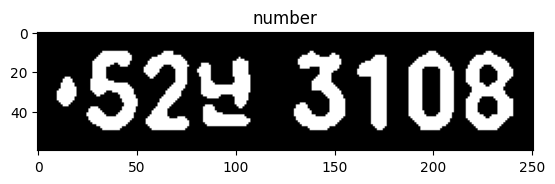

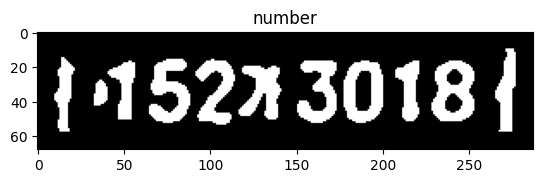

In [45]:
for i, plate_img in enumerate(plate_imgs):
    plate_img = cv2.resize(plate_img, dsize=(0,0), fx=1.6, fy=1.6)
    _,plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    #find contours again
    contours, hierarchy = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)

    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0,0

    
    for contour in contours : 
        contour_x, contour_y, contour_w, contour_h = cv2.boundingRect(contour)
        
        area_temp = contour_w * contour_h
        ratio_temp  = contour_w / contour_h
                
        if area_temp > MIN_AREA and contour_w > MIN_WIDTH and contour_h > MIN_HEIGHT and MIN_RATIO < ratio_temp < MAX_RATIO : 
            
            if contour_x < plate_min_x :
                plate_min_x = contour_x 
            if contour_y < plate_min_y  :
                plate_min_y = contour_y
            if contour_x + contour_w > plate_max_x :
                plate_max_x = contour_x + contour_w
            if contour_y + contour_h > plate_max_y :
                plate_max_y = contour_y + contour_h
                
    img_result = plate_img[plate_min_y : plate_max_y, plate_min_x : plate_max_x]
    
    
    img_result = cv2.GaussianBlur(img_result, ksize=(3,3), sigmaX=0)
    _,img_result = cv2.threshold(img_result, thresh=0.0, maxval = 255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img_result = cv2.copyMakeBorder(img_result, top=10, bottom=10, left=10, right=10, 
                                   borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
    

    gray_draw(img_result,'number')

https://github.com/tesseract-ocr/tessdata/blob/main/kor.traineddata

언어 데이터 파일 다운로드: 한국어를 인식하기 위해 한국어 언어 데이터 파일이 필요합니다. 아래의 링크에서 kor.traineddata 파일을 다운로드하여 설치된 Tesseract OCR의 tessdata 폴더에 넣어야 합니다.

import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'tesseract의_실행_경로'
tesseract_config = '--oem 3 --psm 6 -l kor'  # 한국어 설정

text = pytesseract.image_to_string(image, config=tesseract_config)

https://velog.io/@rlagksql219/python-Tesseract-OCR-%EA%B8%80%EC%9E%90-%EC%9D%B8%EC%8B%9D-qcsivues